In [1]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline
from scripts.my_camera_cal import image_perspective

from scripts.my_line_finding import fit_polynomial
from scripts.my_line_finding import search_around_poly

from scripts.my_process import back_to_world
from scripts.my_process import process
from scripts.my_process import process2
from scripts.my_process import measure_curvature_pixels

In [3]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")
shape0=720

# Processing the video

### Strategy1 only


In [ ]:
def process_image(image):
    #Here I am going to modify to somehow preserve the ll_f rr_f values
    ll_f,rr_f,poly_img,final_img=process2(image,mtx,dist)
    
    #process_image.ll_f,process_image.rr_f,poly_img,final_img= process2(image,mtx,dist,
    #                                                                   l_fit=process_image.ll_f,
    #                                                                   r_fit=process_image.rr_f)
    
    #print(ll_f, rr_f)
    
    #f.write("Left :"+str(ll_f)+ "Right: "+str(rr_f)+"\n")
    f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+"\n")
    
    #process_image.seudo_static+=1
    return final_img

### Improved:

In [11]:
def process_image(image):
    #Here I am going to modify to somehow preserve the ll_f rr_f values
    ll_f,rr_f,poly_img,final_img=process2(image,mtx,dist)
    
    if process_image.ll_f.size==0:   #first time
        f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+"\n")
        process_image.ll_f=ll_f
        process_image.rr_f=rr_f
        return final_img
    
    
#    f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+",")
#    f.write(str(ll_f[0]-process_image.ll_f[0])+","    )
    
    f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+"\n")
    
    if (abs(ll_f[0]-process_image.ll_f[0]) >0.001 or  abs(ll_f[1]-process_image.ll_f[1]) >2 or
     abs(rr_f[0]-process_image.rr_f[0]) >0.001 or  abs(rr_f[1]-process_image.rr_f[1]) >2 ):
        
        #There has been an strange variation (perhaps an outlier) 
        ll_f,rr_f,poly_img,final_img=process2(image,mtx,dist,
                                              l_fit=process_image.ll_f,
                                              r_fit=process_image.rr_f)
        f.write("REPROCESS:\n")
        f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+"\n")
    
    
    #process_image.ll_f,process_image.rr_f,poly_img,final_img= process2(image,mtx,dist,
    #                                                                   l_fit=process_image.ll_f,
    #                                                                   r_fit=process_image.rr_f)
    
    #print(ll_f, rr_f)
    
    #f.write("Left :"+str(ll_f)+ "Right: "+str(rr_f)+"\n")
    #f.write(str(ll_f[0])+","+str(ll_f[1])+","+str(ll_f[2])+","+str(rr_f[0])+","+str(rr_f[1])+","+str(rr_f[2])+"\n")
    
    #process_image.ll_f=ll_f
    #process_image.rr_f=rr_f
    
    #process_image.seudo_static+=1
    return final_img

In [ ]:
def process_image(image):
    #Here I am going to modify to somehow preserve the ll_f rr_f values
    #ll_f,rr_f,poly_img,final_img=process2(image,mtx,dist)
    
    process_image.ll_f,process_image.rr_f,poly_img,final_img= process2(image,mtx,dist,
                                                                       l_fit=process_image.ll_f,
                                                                       r_fit=process_image.rr_f)
    
    process_image.seudo_static+=1
    return final_img

t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../output_video/project_video_out.mp4.
Moviepy - Writing video ../output_video/project_video_out.mp4



Moviepy - Done !
Moviepy - video ready ../output_video/project_video_out.mp4
Wall time: 4min 45s


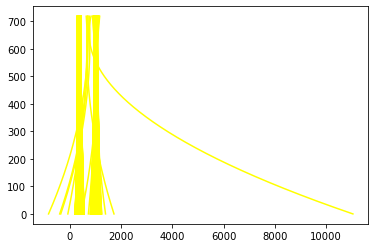

In [12]:
f = open("../output_video/log.csv", "w")
#process_image.seudo_static=0
process_image.ll_f=np.array([])
process_image.rr_f=np.array([])
video_output = '../output_video/project_video_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("../challenge_video.mp4").subclip(0,5)
clip1 = VideoFileClip("../project_video.mp4")

#clip1 = VideoFileClip("../project_video.mp4")
video_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False)
#print("final counter:",process_image.seudo_static)
f.close()

t:   0%|▎                                                                    | 2/485 [00:00<00:37, 12.90it/s, now=None]

Moviepy - Building video ../output_video/challenge_video_out.mp4.
Moviepy - Writing video ../output_video/challenge_video_out.mp4



Moviepy - Done !
Moviepy - video ready ../output_video/challenge_video_out.mp4
Wall time: 1min 52s


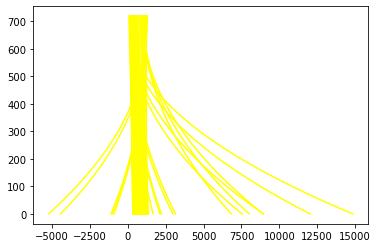

In [13]:
f = open("../output_video/log_challenge.csv", "w")
#process_image.seudo_static=0
process_image.ll_f=np.array([])
process_image.rr_f=np.array([])
video_output = '../output_video/challenge_video_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("../challenge_video.mp4").subclip(0,5)
clip1 = VideoFileClip("../challenge_video.mp4")

#clip1 = VideoFileClip("../project_video.mp4")
video_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False)
f.close()


t:   0%|                                                                            | 0/1199 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../output_video/harder_challenge_video_out.mp4.
Moviepy - Writing video ../output_video/harder_challenge_video_out.mp4



Moviepy - Done !
Moviepy - video ready ../output_video/harder_challenge_video_out.mp4
Wall time: 7min 56s


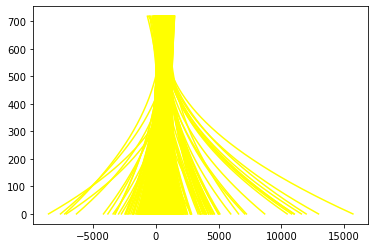

In [14]:
f = open("../output_video/log_harder_challenge.csv", "w")
process_image.ll_f=np.array([])
process_image.rr_f=np.array([])
video_output = '../output_video/harder_challenge_video_out.mp4'
clip1 = VideoFileClip("../harder_challenge_video.mp4")

#clip1 = VideoFileClip("../project_video.mp4")
video_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False)
f.close()


In [ ]:
HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(video_output))